## Introduction to Briefings (ArcGIS StoryMaps)

Using the ArcGIS API for Python you can build Briefings in ArcGIS StoryMaps. Briefings offer a slide-based output ideal for delivering presentations that integrate maps and data from your organization. You can now create elegant and interactive slide-based presentations called briefings for succinct storytelling and offline sharing with ArcGIS StoryMaps. 

In [25]:
from arcgis.gis import GIS
from arcgis.apps import storymap
from arcgis.apps.storymap import Briefing, Themes, Text, TextStyles, Image, BriefingSlide, SlideLayout, Map

In [6]:
gis = GIS(profile='your_online_profile')

We will start by creating a `Briefing` and then updating the `Cover` and `Theme` for this Briefing. 

In [7]:
my_briefing = Briefing()

In [8]:
img = Image("https://www.nps.gov/npgallery/GetAsset/69680c29-caa3-42da-93d9-32925e9ed409/proxy/hires")

In [9]:
cover = my_briefing.slides[0].cover
cover.title = "Nature Presentation"
cover.summary = "Briefing about nature created programmatically"
cover.by_line = "Nature Briefing"
cover.media = img

In [10]:
my_briefing.theme(Themes.SLATE)

True

In [11]:
my_briefing.set_logo('D:/Github Projects/geosaurus/tests/resources/storymap/storymap_image_river.jpg')

True

We will now save this Briefing and verify these updates.

In [13]:
my_briefing.save(title = "Nature themed Briefing slides")

<Item title:"Nature themed Briefing slides" type:StoryMap owner:MMajumdar_geosaurus>

![cover](https://github.com/user-attachments/assets/1c80f060-285e-46a8-aee0-d82cc552f74b)

We have successfully updated the Cover or opening slide of the Briefing. 

### Concept of slides and blocks

Similar to traditional presentations with slides, `Briefing`s come with `BriefingSlide`s to add structured content to your Briefing.

Each slide within has one or more blocks, and the number of blocks need to be specified during slide creation using the `num_blocks` parameter. A block represents a section that holds individual content elements. 

To learn more about ArcGIS StoryMaps content elements supported within the ArcGIS API for Python, please refer to the [Introduction to StoryMaps](../introduction-to-storymaps) guide.

We start by creating three slides below.

In [14]:
new_slide = BriefingSlide(layout=SlideLayout.FLEXIBLE, num_blocks=1)
slide1 = my_briefing.add(slide=new_slide)

In [15]:
new_slide = BriefingSlide(layout=SlideLayout.FLEXIBLE, num_blocks=2)
slide2 = my_briefing.add(slide=new_slide)

In [17]:
new_slide = BriefingSlide(layout=SlideLayout.SINGLE)
slide3 = my_briefing.add(slide=new_slide)

### Adding text to a block in a slide

Our first slide has one block. We will update it with a text summary of the contents of this `Briefing`.

In [22]:
block_1 = slide1.blocks[0]

In [26]:
quote = Text(
    text="This Briefing will have images related to nature, and a map about the coverage of Forests in the US.",
    style=TextStyles.QUOTE,
)

In [27]:
block_1.add_content(quote)

Text(text=This Briefing will have images related to nature, and a map about the coverage of Forests in the US.)

In [28]:
my_briefing.save()

<Item title:"Nature themed Briefing slides" type:StoryMap owner:MMajumdar_geosaurus>

The first slide is successfully updated with text. 

![text](https://github.com/user-attachments/assets/9042ce80-e481-465f-b3b7-a5c8f0450555)

### Add images to blocks in a slide

Our second slide has two blocks. Let's add images to each of those blocks. 

In [18]:
block1 = slide2.blocks[0]
block2 = slide2.blocks[1]

In [19]:
image1 = Image(
    "https://www.nps.gov/npgallery/GetAsset/36106ED0-1DD8-B71C-07ED73544EA246C7/proxy/hires"
)
image2 = Image(
    "https://www.nps.gov/npgallery/GetAsset/0022D3FF-1DD8-B71B-0BE3AD4C48F96FF9/proxy/hires"
)

In [20]:
block1.add_content(image1)
block2.add_content(image2)

Image(image='https://www.nps.gov/npgallery/GetAsset/0022D3FF-1DD8-B71B-0BE3AD4C48F96FF9/proxy/hires')

In [21]:
my_briefing.save()

<Item title:"Nature themed Briefing slides" type:StoryMap owner:MMajumdar_geosaurus>

Our briefing has now updated the two blocks with images.

![image](https://github.com/user-attachments/assets/beda5a54-ffe5-4c78-8e07-12a7f510d807)

### Adding a Map to a block in a slide

We will now fetch a map item and add it to the third slide.

In [32]:
map1 = gis.content.get('dd3e4259b7434f1ebd488c09a8611ddf')
map1_for_storymap = storymap.Map(map1)

In [33]:
block_3 = slide3.blocks[0]

In [34]:
block_3.add_content(map1_for_storymap)

Map(item='dd3e4259b7434f1ebd488c09a8611ddf', type='Web Map')

In [35]:
my_briefing.save()

<Item title:"Nature themed Briefing slides" type:StoryMap owner:MMajumdar_geosaurus>

The slide now displays this map.

![map_block](https://github.com/user-attachments/assets/91cdd96f-ca8a-4d43-ae9c-497ff579ad2b)

### Duplicate this briefing

Similar to a `StoryMap`, you can also `duplicate()` a `Briefing`. 

Note: The `duplicate()` function will create a copy of the `Briefing` item alone. To copy the deep dependencies of the Briefing (e.g., maps, scenes, layer, tables), you will need to use the `clone_items()` function. Please refer to the [Cloning and Editing of StoryMaps](../cloning-editing-storymaps) guide to learn more about these differences. 

In [36]:
duplicate = my_briefing.duplicate("Copy of my Nature themed Briefing")
duplicate

<Item title:"Copy of my Nature themed Briefing" type:StoryMap owner:MMajumdar_geosaurus>

### Move a slide to the end

You can also [`move()`](https://developers.arcgis.com/python/latest/api-reference/arcgis.apps.storymap.html#arcgis.apps.storymap.briefing.Briefing.move) or re-position slides in a Briefing. Let's see a few examples below. 

If no value is provided for the `position` parameter, it moves the slide to the end. 

Note: Cover slide (index 0) cannot be moved.

In [37]:
my_briefing.move(slide=2)

True

### Move a slide to the top

In [38]:
my_briefing.move(slide=2, position=1)

True

In [39]:
my_briefing.save()

<Item title:"Nature themed Briefing slides" type:StoryMap owner:MMajumdar_geosaurus>

### Copy updated content over to the duplicated Briefing

The ArcGIS API for Python also allows for copying selective sections of a Briefing over to another using the [`copy_content()`](https://developers.arcgis.com/python/latest/api-reference/arcgis.apps.storymap.html#arcgis.apps.storymap.briefing.Briefing.copy_content) method if you do not wish to clone all the content of a Briefing. 

This capability can be beneficial in a few cases. 
1. You may already have another Briefing item in your organization with relevant slides and information that you need to add to your current Briefing, without cloning the entire Briefing.
2. You may have cloned an existing Briefing, updated it with a few more slides and would like to copy those over back to the original Briefing.

We will explore the first use-case through an example below. 

Note: If you wish to copy all the slides of a Briefing, you need to ensure that you are not copying the `Cover` slide of one Briefing over to another. We can remove that slide by excluding its index, as shown below. 

https://storymaps.arcgis.com/briefings/203ca5e1ffc141528cbdf7bced801274
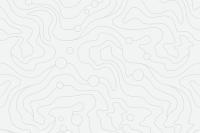

In [40]:
source_briefing_item = gis.content.get('203ca5e1ffc141528cbdf7bced801274')
source_briefing = Briefing(source_briefing_item)
source_briefing

In [46]:
content = source_briefing.slides[1:]

In [42]:
source_briefing.copy_content(target_briefing = my_briefing, content = content)

True

### Publish the Briefing

We will now publish this Briefing by setting `publish=True` in the `save()` function.

In [43]:
my_briefing.save(publish=True)

<Item title:"Nature themed Briefing slides" type:StoryMap owner:MMajumdar_geosaurus>